# Oefenen met Pandas

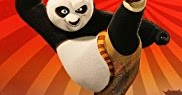

## Bron

De Comodity Prices dataset komt van Kaggle:

https://www.kaggle.com/datasets/elmoallistair/commodity-prices-19602021

## Beschrijving

De dataset bevat de gemiddelde jaarprijs van **30** grondstoffen tussen **1960-2021**.

## Opdracht 1: inlezen

Lees de Comodity Prices dataset in.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read csv file
# !pwd
df = pd.read_csv('./data/commodity_prices.csv')

## Opdracht 2: exploreren

Welke kolommen bevat deze dataset?

In [4]:
# Print info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           62 non-null     int64  
 1   Cocoa          62 non-null     float64
 2   Coffee         62 non-null     float64
 3   Tea            62 non-null     float64
 4   Crude Oil      62 non-null     float64
 5   Coal           52 non-null     float64
 6   Natural Gas    62 non-null     float64
 7   Banana         62 non-null     float64
 8   Sugar          62 non-null     float64
 9   Orange         62 non-null     float64
 10  Barley         61 non-null     float64
 11  Maize          62 non-null     float64
 12  Sorghum        61 non-null     float64
 13  Rice           62 non-null     float64
 14  Wheat          62 non-null     float64
 15  Beef           62 non-null     float64
 16  Chicken        62 non-null     float64
 17  Lamb           51 non-null     float64
 18  Shrimps     

Welk datatype heeft elke kolom?

## Beschrijf datatype

Year: int

All other columns: float64

Wat is de gemiddelde prijs voor ruwe olie over de jaren?

In [5]:
# Zoek in de Pandas documentatie een geschikte functie
# Hint: https://pandas.pydata.org/docs/reference/series.html

# ...

# Voer deze functie uit op het veld 'Crude Oil' en print het resultaat
mean_price_crude_oil = df['Crude Oil'].mean()
f"Mean price of Crude Oil throughout the years: {mean_price_crude_oil:.2f} ($/bbl)"

'Mean price of Crude Oil throughout the years: 30.89 ($/bbl)'

Wanneer was de olieprijs op zijn hoogst? En op zijn laagst?

In [6]:
# Print highest and lowest price

max_price_crude_oil = df['Crude Oil'].max()
min_price_crude_oil = df['Crude Oil'].min()

print(f"Min and max price of Crude Oil respectively: {min_price_crude_oil:.2f} - {max_price_crude_oil:.2f} ($/bbl)")

# Print het jaar van de hoogste en laagste prijs

crude_oil_max_year = df.loc[df['Crude Oil'].idxmax(), 'Year']
crude_oil_min_year = df.loc[df['Crude Oil'].idxmin(), 'Year']

f"Years of highest and lowest price of Crude Oil respectively: {crude_oil_max_year} - {crude_oil_min_year}"

Min and max price of Crude Oil respectively: 1.21 - 105.01 ($/bbl)


'Years of highest and lowest price of Crude Oil respectively: 2012 - 1970'

Net als SQL kan Pandas ook queries uitvoeren en filteren.

Zoek alle jaren waarin de olieprijs tussen 50 en 80 dollar was.

In [7]:
# Hint: filter jaren waar de prijs tussen 50 en 80 was

df[(df['Crude Oil'] > 50) & (df['Crude Oil'] < 80)]['Year']

45    2005
46    2006
47    2007
49    2009
50    2010
55    2015
57    2017
58    2018
59    2019
61    2021
Name: Year, dtype: int64

## Opdracht 3: samenstellen

Stel dat Nutella zou bestaan uit 50% cacao, 20% suiker, 5% mais en 25% kokosolie.

Verder is gegeven:

- voor deze grondstoffen is de prijs per kilogram
- een pot bevat 800 gram Nutella

Wat is dan de prijs voor een pot Nutella in elk jaar?

<AxesSubplot: xlabel='Year'>

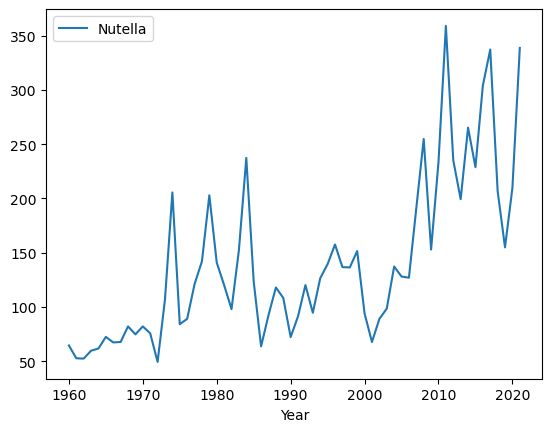

In [8]:
# Voeg een kolom 'Nutella' toe aan het DataFrame:

# ...

# Bereken de prijs voor een pot van 800 gram over de jaren heen:

df['Nutella'] = (.5 * 0.8 * df['Cocoa']) + (.2 * 0.8 * df['Sugar']) + (.05 * 0.8 * df['Maize']) + (.25 * 0.8 * df['Coconut Oil'])
df.plot(x="Year", y="Nutella")

## Opdracht 4: aanvullen

Zoals je ziet, ontbreekt de data voor kolen.

- Tussen welke jaartallen is dat?

In [9]:
# Gebruik Pandas voor deze analyse:

df[df['Coal'].isna()]['Year']

0    1960
1    1961
2    1962
3    1963
4    1964
5    1965
6    1966
7    1967
8    1968
9    1969
Name: Year, dtype: int64

Plot de data voor de grondstoffen.

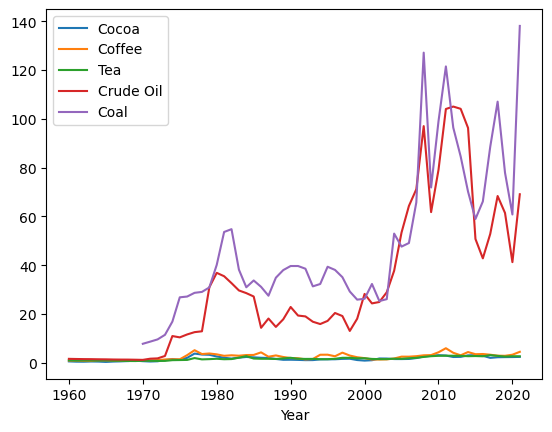

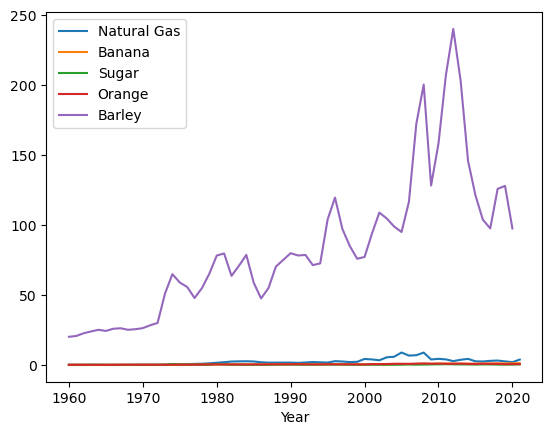

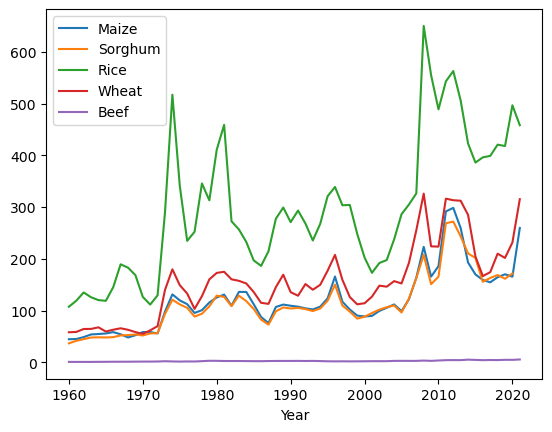

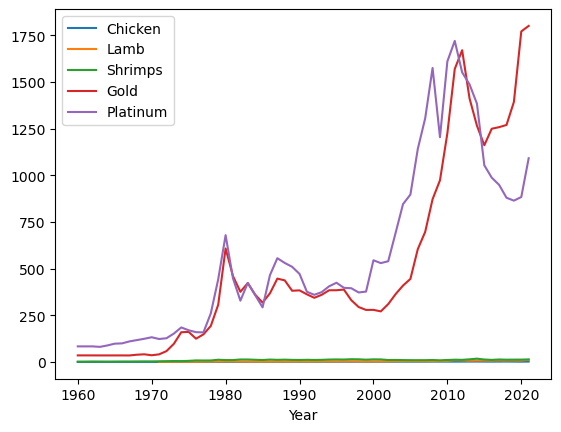

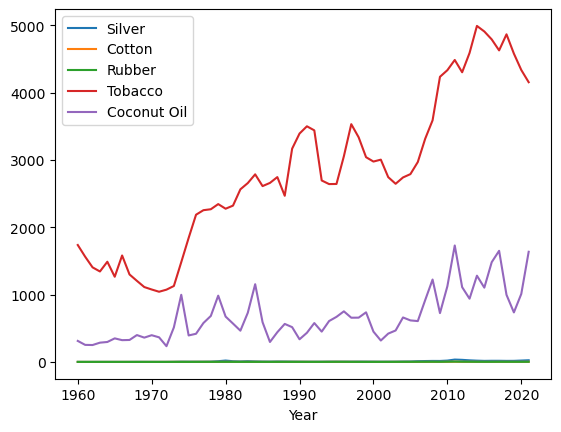

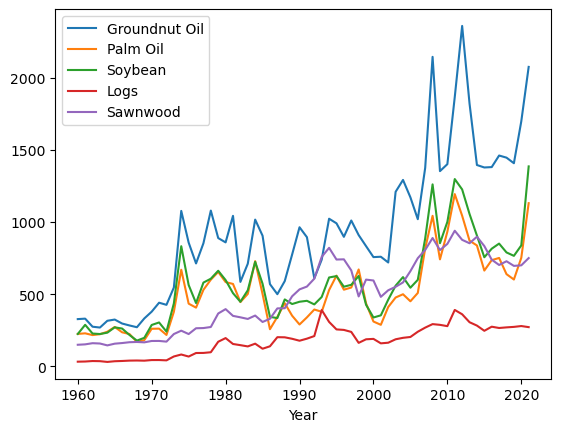

In [10]:
# Plot de data:

# Set index to year
df_year_index = df.set_index('Year')
# Init empty list
raw_materials = []
# Create plots with 5 raw materials at a time
for idx, raw_material in enumerate(df_year_index.columns):
    raw_materials.append(raw_material)
    if (idx + 1) % 5 == 0:
        df_year_index.plot(y=raw_materials)
        # empty list
        raw_materials = []

Maak op basis van de aanwezige data een schatting van de ontbrekende waarden:

1. Kun je op basis van de curve een schatting maken?
2. Loopt de prijs van kolen op met een andere grondstof?
3. Kun je die als schatting gebruiken?
4. Vul de data aan in de set en sla de set op

11.635238095238096


<AxesSubplot: xlabel='Year'>

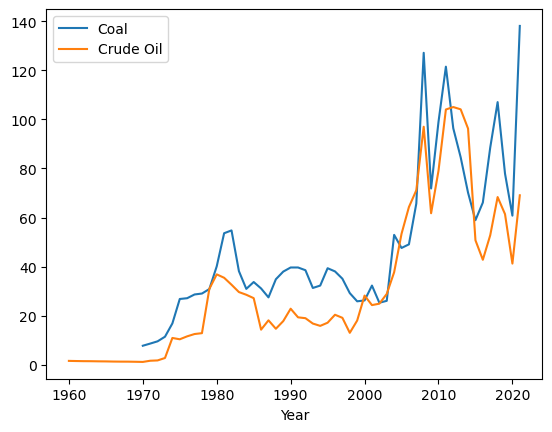

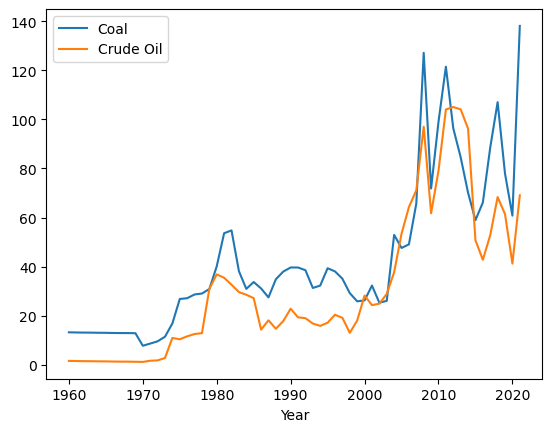

In [11]:
# Analyseer de curves by 'eyeballing':
# Plot coal and Crude Oil graphs
df_year_index.plot(y=['Coal', 'Crude Oil'])

# Find difference in price between Crude Oil and Coal
df_year_index['Crude Oil / Coal Diff'] = df_year_index['Coal'] - df_year_index['Crude Oil']

# Find mean diff crude oil and Coal prices between 1970 and 1990
diff = df_year_index.loc['1970':'1990', 'Crude Oil / Coal Diff'].mean()

print(diff)
# Maak een schatting van de waarden

# Gebruik Pandas om de data aan te vullen en op te slaan:

df_year_index.loc['1960':'1969', 'Coal'] = df_year_index['Crude Oil'] + diff

# Plot de new graph
df_year_index.plot(y=['Coal', 'Crude Oil'])

## Gefeliciteerd!

Je ben nu een kung fu panda.